# Homework I

Joana Peixinho (ist1103335) & Miguel Fernandes (ist1103573)


## I. Pen and Paper [13v]

Consider the following dataset


![Decision Tree](./decision_tree.png)


## 1) Consider 𝐱1–𝐱7 to be training observations, 𝐱8–𝐱9 to be testing observations, 𝑦1– 𝑦5 to be input variables and 𝑦6 to be the target variable. Hint: you can use scipy.stats.multivariate_normal for multivariate distribution calculus

### a.) [3.5v] Learn a Bayesian classifier assuming: i) {𝑦1, 𝑦2}, {𝑦3, 𝑦4} and {𝑦5} sets of independent variables (e.g., 𝑦1 ⫫ 𝑦3 yet 𝑦1 ⫫ 𝑦2), and  ii) 𝑦1 × 𝑦2 ∈ ℝ2 is normally distributed.  Show all parameters (distributions and priors for subsequent testing).



In [3]:
import numpy as np
from scipy.stats import multivariate_normal

# Training data for y1, y2, y3, y4, y5, y6
train_data = np.array([
    [0.24, 0.36, 1, 1, 0, 'A'],
    [0.16, 0.48, 1, 0, 1, 'A'],
    [0.32, 0.72, 0, 1, 2, 'A'],
    [0.54, 0.11, 0, 0, 1, 'B'],
    [0.66, 0.39, 0, 0, 0, 'B'],
    [0.76, 0.28, 1, 0, 2, 'B'],
    [0.41, 0.53, 0, 1, 1, 'B']
])

# Separate data by class A and B
class_A_data = train_data[train_data[:, -1] == 'A'][:, :-1].astype(float)
class_B_data = train_data[train_data[:, -1] == 'B'][:, :-1].astype(float)

# Calculate means and covariance matrices for y1, y2, y3, y4, y5 in class A and B
mean_A = np.mean(class_A_data, axis=0)
mean_B = np.mean(class_B_data, axis=0)
cov_A = np.cov(class_A_data, rowvar=False)
cov_B = np.cov(class_B_data, rowvar=False)

# Assuming 𝑦1 × 𝑦2 is normally distributed, estimate the parameters for this bivariate normal distribution
mean_y1_y2_A = mean_A[:2]  # Mean of {𝑦1, 𝑦2} in class A
mean_y1_y2_B = mean_B[:2]  # Mean of {𝑦1, 𝑦2} in class B

cov_y1_y2_A = cov_A[:2, :2]  # Covariance matrix of {𝑦1, 𝑦2} in class A
cov_y1_y2_B = cov_B[:2, :2]  # Covariance matrix of {𝑦1, 𝑦2} in class B

# Calculate prior probabilities
prior_A = len(class_A_data) / len(train_data)
prior_B = len(class_B_data) / len(train_data)

# Define multivariate normal distributions for y1, y2, y3, y4, y5, and y6
mvn_y1_A = multivariate_normal(mean=mean_A[0], cov=cov_A[0, 0])
mvn_y2_A = multivariate_normal(mean=mean_A[1], cov=cov_A[1, 1])
mvn_y3_A = multivariate_normal(mean=mean_A[2], cov=cov_A[2, 2])
mvn_y4_A = multivariate_normal(mean=mean_A[3], cov=cov_A[3, 3])
mvn_y5_A = multivariate_normal(mean=mean_A[4], cov=cov_A[4, 4])

mvn_y1_B = multivariate_normal(mean=mean_B[0], cov=cov_B[0, 0])
mvn_y2_B = multivariate_normal(mean=mean_B[1], cov=cov_B[1, 1])
mvn_y3_B = multivariate_normal(mean=mean_B[2], cov=cov_B[2, 2])
mvn_y4_B = multivariate_normal(mean=mean_B[3], cov=cov_B[3, 3])
mvn_y5_B = multivariate_normal(mean=mean_B[4], cov=cov_B[4, 4])

# Print the calculated parameters and prior probabilities
print("Means and Covariance for y1, y2 in Class A:")
print(mean_A[:2])
print(cov_A[:2, :2])
print("\nMeans and Covariance for y1, y2 in Class B:")
print(mean_B[:2])
print(cov_B[:2, :2])
print("\nParameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class A:")
print("Mean:", mean_y1_y2_A)
print("Covariance Matrix:")
print(cov_y1_y2_A)
print("\nParameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class B:")
print("Mean:", mean_y1_y2_B)
print("Covariance Matrix:")
print(cov_y1_y2_B)
print("\nPrior Probabilities:")
print("P(y1):", prior_A)
print("P(y2):", prior_B)


Means and Covariance for y1, y2 in Class A:
[0.24 0.52]
[[0.0064 0.0096]
 [0.0096 0.0336]]

Means and Covariance for y1, y2 in Class B:
[0.5925 0.3275]
[[ 0.02289167 -0.00975833]
 [-0.00975833  0.03149167]]

Parameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class A:
Mean: [0.24 0.52]
Covariance Matrix:
[[0.0064 0.0096]
 [0.0096 0.0336]]

Parameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class B:
Mean: [0.5925 0.3275]
Covariance Matrix:
[[ 0.02289167 -0.00975833]
 [-0.00975833  0.03149167]]

Prior Probabilities:
P(y1): 0.42857142857142855
P(y2): 0.5714285714285714


### b.) [2.5v] Under a MAP assumption, classify each testing observation showing all your calculus.


### c.) [2v] Consider that the default decision threshold of 𝜃 = 0.5 can be adjusted according to 𝑓(𝐱|𝜃) = { A 𝑃(A|𝐱) > 𝜃 B otherwise . Under a maximum likelihood assumption, what thresholds optimize testing accuracy?

### 2) Let 𝑦1 be the target numeric variable, 𝑦2-𝑦6 be the input variables where 𝑦2 is binarized under an equal-width (equal-range) discretization. For the evaluation of regressors, consider a 3-fold cross-validation over the full dataset (𝐱1- 𝐱9) without shuffling the observations.

a. [1v] Identify the observations and features per data fold after the binarization procedure.

b. [4v] Consider a distance-weighted 𝑘NN with 𝑘 = 3, Hamming distance (𝑑), and 1/𝑑 weighting. Compute the MAE of this 𝑘NN regressor for the 1st iteration of the cross-validation (i.e. train observations have the lower indices).


## Programming [7v]

**Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab.
Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.**


In [7]:
#Load the data

import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

# Extract features and labels
X = df.drop(columns=['class'])  # Features
y = df['class']  # Labels


# Perform 10-fold stratified cross-validation with shuffling
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


### 1) [3v]

**Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption
(consider all remaining parameters for each classifier as sklearn’s default):
a. Plot two boxplots with the fold accuracies for each classifier.
b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding
accuracy”, asserting whether is true**


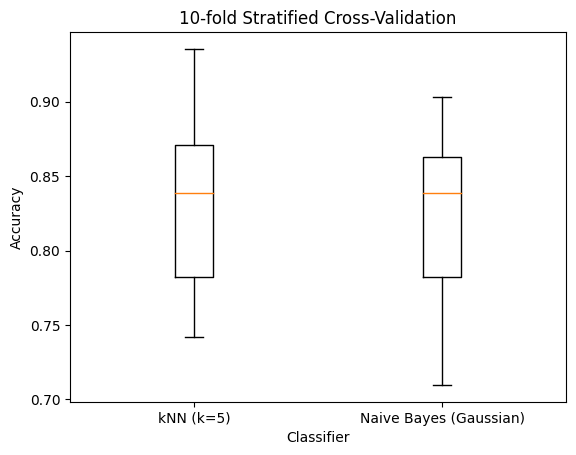

In [9]:
#a) plot two boxplost with the fold accuracies for kNN with k=5 and naive Bayes with Gaussian assumptions
# Plotting the boxplots
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create a list of classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]

# Create a list of classifier names
classifier_names = [
    'kNN (k=5)',
    'Naive Bayes (Gaussian)'
]

# Create a list of classifier accuracies
classifier_accuracies = []

# Iterate through each classifier
for classifier in classifiers:
    # Perform 10-fold stratified cross-validation with shuffling
    accuracies = cross_val_score(classifier, X, y, cv=stratified_kfold)
    classifier_accuracies.append(accuracies)

# Plotting the boxplots
plt.boxplot(classifier_accuracies)
plt.xticks(np.arange(1, len(classifier_names) + 1), classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('10-fold Stratified Cross-Validation')
plt.show()


### 2) [2.5v]

**Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance,
all remaining parameters as default). Plot the differences between the two cumulative confusion
matrices of the predictors. Comment.**


### 3) [1.5v]

**Considering the unique properties of column_diagnosis, identify three possible difficulties
of naïve Bayes when learning from the given dataset.**
